In [1]:
import pandas as pd, numpy as np, statsmodels.api as sm

In [2]:
df = pd.read_csv("./insurance.csv")

In [3]:
label = "charges"

y = df.charges
X = df[["age", "bmi", "children"]].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           8.80e-37
Time:                        18:34:12   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          239.9945     22.289     10.767      0.0

In [4]:
for col in df:
  if not pd.api.types.is_numeric_dtype(df[col]):
    df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True, dtype=int)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [5]:
X = df.drop(columns=[label]).assign(const=1)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:34:12   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.8564     11.899  

In [6]:
from sklearn import preprocessing 

df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df), columns=df.columns)

df_zscore.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


In [7]:
y = df_zscore.charges
X = df_zscore.drop(columns=[label]).assign(const=1 )

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:34:12   Log-Likelihood:                -968.66
No. Observations:                1338   AIC:                             1955.
Df Residuals:                    1329   BIC:                             2002.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.2980      0.014  

<Axes: xlabel='charges', ylabel='Count'>

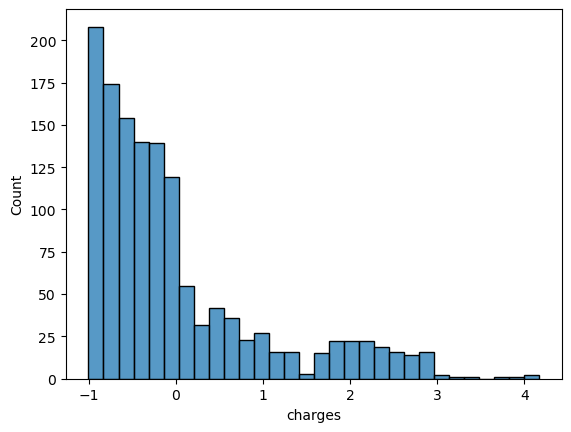

In [8]:
import seaborn as sns

sns.histplot(y)

In [9]:
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns=df.columns)
df_minmax.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,1.0,0.0,1.0,0.0,0.0


<Axes: xlabel='charges', ylabel='Count'>

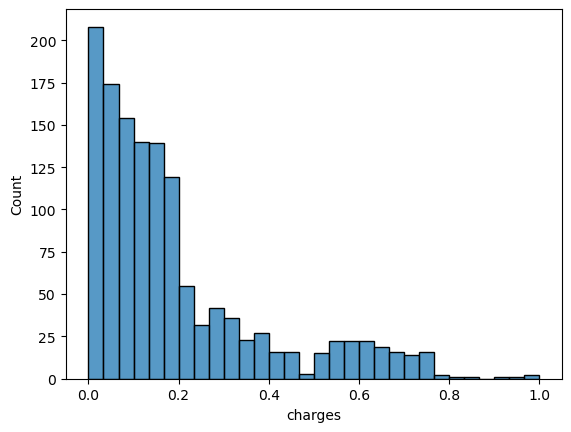

In [10]:
sns.histplot(df_minmax.charges)

In [11]:
y = df_minmax.charges
X = df_minmax.drop(columns=[label]).assign(const=1 )

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:34:13   Log-Likelihood:                 1230.9
No. Observations:                1338   AIC:                            -2444.
Df Residuals:                    1329   BIC:                            -2397.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.1886      0.009  

<Axes: xlabel='charges', ylabel='Count'>

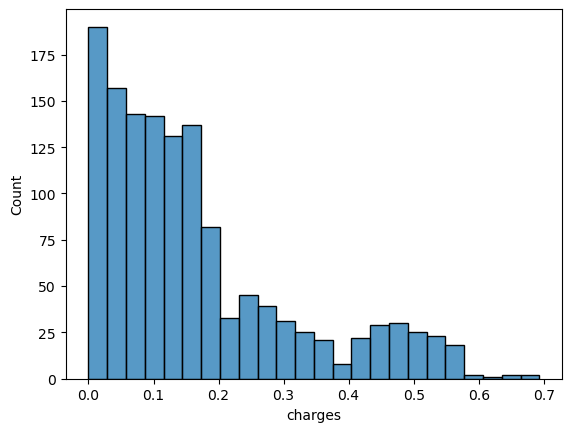

In [12]:
y = np.log1p(y)
sns.histplot(y)

<Axes: xlabel='charges', ylabel='Count'>

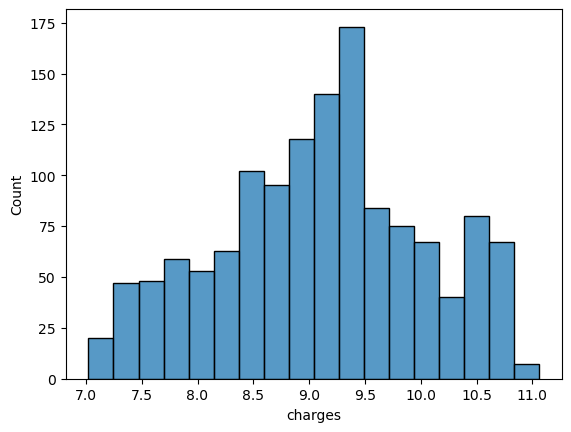

In [14]:
sns.histplot(np.log(df.charges))

In [16]:
y = np.log(df.charges)
X = df.drop(columns=[label]).assign(const=1)

print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:38:47   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0346      0.001  